# 1. Seasonality

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose  # Seasonality, Trends, Transpose 
from statsmodels.graphics.tsaplots import plot_acf   # Autocorrelation

In [2]:
# Generate data
np.random.seed(85)
dates = pd.date_range(start="2023-01-01", periods=1000, freq='D')
values = np.random.rand(1000)

dates, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
                '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
                '2025-09-25', '2025-09-26'],
               dtype='datetime64[ns]', length=1000, freq='D'),
 array([0.62037381, 0.50895307, 0.29824484, 0.65379871, 0.27350653,
        0.52312608, 0.37324974, 0.36927859, 0.7346936 , 0.64863888,
        0.92579673, 0.22714814, 0.40555275, 0.88368074, 0.20890112,
        0.21378726, 0.28344035, 0.45312884, 0.33757139, 0.01173726,
        0.39694687, 0.68914231, 0.83520331, 0.31578849, 0.71918911,
        0.50498986, 0.3674922 , 0.18296085, 0.53665916, 0.03160998,
        0.59859214, 0.77609494, 0.22372453, 0.62627289, 0.41232011,
        0.62107257, 0.23957974, 0.30725726, 0.25829266, 0.093765

In [3]:
# Create a dataframe
data = pd.DataFrame({'Date': dates, 'Value': values})

data

,Date,Value
0,2023-01-01,0.620374
1,2023-01-02,0.508953
2,2023-01-03,0.298245
3,2023-01-04,0.653799
4,2023-01-05,0.273507
...,...,...
995,2025-09-22,0.203958
996,2025-09-23,0.080595
997,2025-09-24,0.379506
998,2025-09-25,0.328634


In [4]:
# Save as a csv file
data.to_csv('./data/time_data_sample.csv', index=False, encoding='utf-8')

In [5]:
# Check the file
data = pd.read_csv('./data/time_data_sample.csv',
                  parse_dates=['Date'],   # `parse_date`: Parse data to types date/time
                  index_col='Date')       # `index_col`: Set a column as an index

data

,Value
Date,
2023-01-01,0.620374
2023-01-02,0.508953
2023-01-03,0.298245
2023-01-04,0.653799
2023-01-05,0.273507
...,...
2025-09-22,0.203958
2025-09-23,0.080595
2025-09-24,0.379506


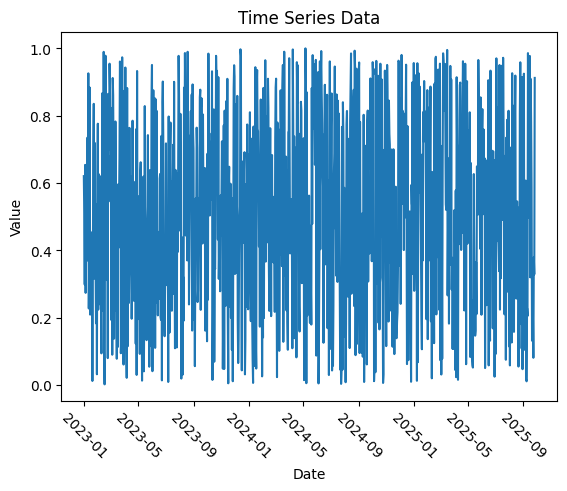

In [6]:
# Visualization
plt.plot(data.index, data['Value'])
plt.xticks(rotation=-45)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')

plt.show()

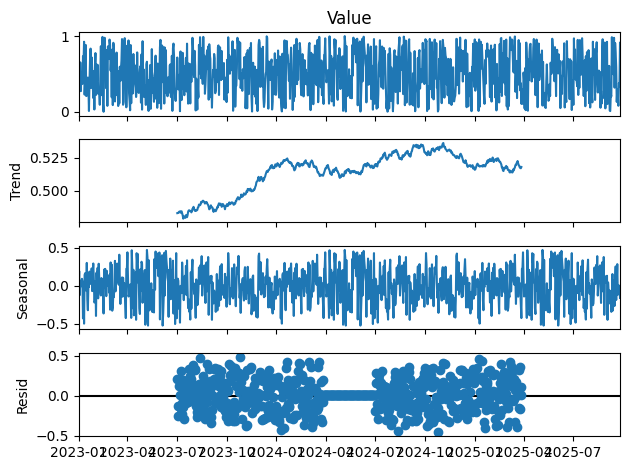

In [7]:
# Trend Analysis
result = seasonal_decompose(data['Value'], 
                            model='additive',
                            period=365)   # 365 days

result.plot()
plt.show()

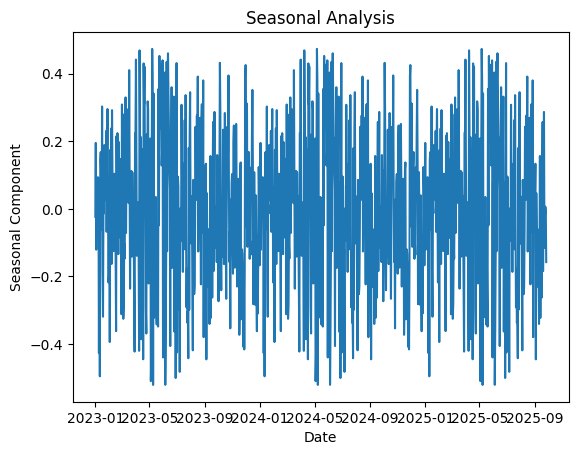

In [8]:
# Seasonality Analysis
seasonal_component = result.seasonal

plt.plot(seasonal_component)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Analysis')
plt.show()